In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import math
import scipy.stats as stats

In [ ]:
from scipy.stats import chi2

In [ ]:
def chi2_ind_att(df, alpha):
  row_total = sum(df.values.T)
  column_total = sum(df.values)
  total = sum(row_total)
  obs_freq = []
  exp_freq = []
  chi2_stats = 0
  m = len(row_total)
  n = len(column_total)
  for i in range(m):
      for j in range(n):
        exp = row_total[i]*column_total[j]/total
        exp_freq.append(exp)
        obs = df.values[i][j]
        obs_freq.append(obs)
        chi2_stats = chi2_stats + (obs - exp)**2/exp
  print(f"Observed Frequency = {obs_freq}")
  print(f"Expected Frequency = {exp_freq}")
  dof = (m - 1)*(n - 1)
  p_value = chi2.sf(chi2_stats, dof)
  print(f"Chisquare statistics: {chi2_stats} and p-value: {p_value}")
  if p_value > alpha:
    print(f"Failed to reject null hypothesis for level of significance = {alpha}")
  else:
    print(f'Null Hypothesis is rejected for level of significance = {alpha}')


## Q1
For a give Titanic dataset, can it be concluded that gender and survival of passengers are related to each other? 

In [ ]:
path = "/content/drive/MyDrive/Datasets/Titanic sds.csv"
data = pd.read_csv(path)
df = pd.crosstab(index = data.Sex, columns = data.Survived)
df.head()

Survived,0,1
Sex,,
female,154,308
male,709,142


In [ ]:
print("\nNull Hypothesis is that gender and survival of passengers are independant of each other")
print("Alternate Hypothesis is that gender and survival of passengers are related to each other")
alpha = 0.05
chi2_ind_att(df, alpha)


Null Hypothesis is that gender and survival of passengers are independant of each other
Alternate Hypothesis is that gender and survival of passengers are related to each other
Observed Frequency = [154, 308, 709, 142]
Expected Frequency = [303.66031987814165, 158.33968012185835, 559.3396801218584, 291.66031987814165]
Chisquare statistics: 332.05702407732934 and p-value: 3.4258545563697882e-74
Null Hypothesis is rejected for level of significance = 0.05


## Q2
For a give Titanic dataset, can it be concluded that class and survival of passengers are related to each other? 

In [ ]:
df = pd.crosstab(index = data.PClass, columns = data.Survived)
df.head()

Survived,0,1
PClass,,
1st,129,193
2nd,160,119
3rd,573,138


In [ ]:
print("Null Hypothesis is that class and survival of passengers are independant of each other")
print("Alternate Hypothesis is that class and survival of passengers are related to each other")
alpha = 0.05
chi2_ind_att(df, alpha)

Null Hypothesis is that class and survival of passengers are independant of each other
Alternate Hypothesis is that class and survival of passengers are related to each other
Observed Frequency = [154, 308, 709, 142]
Expected Frequency = [303.66031987814165, 158.33968012185835, 559.3396801218584, 291.66031987814165]
Chisquare statistics: 332.05702407732934 and p-value: 3.4258545563697882e-74
Null Hypothesis is rejected for level of significance = 0.05


## Q3
A table shows the number of men and women buying different types of pets. Can it be concluded that gender and choice of pet are related to each other? 

In [ ]:
data = [[207,282,241], [234,242,232]]
df = pd.DataFrame(data, columns = ['dog', 'cat', 'bird'], index = ['men', 'women'])
df.head()

,dog,cat,bird
men,207,282,241
women,234,242,232


In [ ]:
print("Null Hypothesis is that gender and choice of pet are independant of each other")
print("Alternate Hypothesis is that gender and choice of pet are related to each other")
alpha = 0.05
chi2_ind_att(df, alpha)

Null Hypothesis is that gender and choice of pet are independant of each other
Alternate Hypothesis is that gender and choice of pet are related to each other
Observed Frequency = [207, 282, 241, 234, 242, 232]
Expected Frequency = [223.87343532684284, 266.00834492350486, 240.1182197496523, 217.12656467315716, 257.99165507649514, 232.8817802503477]
Chisquare statistics: 4.542228269825232 and p-value: 0.1031971404730939
Failed to reject null hypothesis for level of significance = 0.05


## Q4
For the given drug data, can we conclude that treatment is effective? 

In [ ]:
path = "/content/drive/MyDrive/Datasets/drugdata.csv"
dataset = pd.read_csv(path)

data = [[60, 10], [30, 25]]
df = pd.DataFrame(data, columns = ['cured', 'noncured'], index = ['treated', 'nontreated'])
df.head()

,cured,noncured
treated,60,10
nontreated,30,25


In [ ]:
print("Null Hypothesis is that treatment is not effective")
print("Alternate Hypothesis is that treatment is effective")
alpha = 0.05
chi2_ind_att(df, alpha)

Null Hypothesis is that treatment is not effective
Alternate Hypothesis is that treatment is effective
Observed Frequency = [60, 10, 30, 25]
Expected Frequency = [50.4, 19.6, 39.6, 15.4]
Chisquare statistics: 14.842300556586274 and p-value: 0.00011688424010613195
Null Hypothesis is rejected for level of significance = 0.05


## Q5
The table below is an exit poll which displays the joint responses to 2 categorical variables: people in categories from 18–29, 30–44, 45–64 and >65 years, and their political affiliation, which is “Conservative”, “Socialist” and “Other”. Create data corresponding to this information. Is there any evidence of a relationship between the age group and their political affiliation, at 5% significant level? 

In [ ]:
data = [[141, 68, 4], [179, 159, 7], [220, 216, 4], [86, 101, 4]]
df = pd.DataFrame(data, columns = ['Conservative', 'Socialist', 'Other'], index = ['18-29', '30-44', '45-64', '65 & older'])
df

,Conservative,Socialist,Other
18-29,141,68,4
30-44,179,159,7
45-64,220,216,4
65 & older,86,101,4


In [ ]:
print("Null Hypothesis is that there is no relationship between age group and their political affiliation")
print("Alternate Hypothesis is that there is a relationship between age group and their political affiliation")
alpha = 0.05
chi2_ind_att(df, alpha)

Null Hypothesis is that there is no relationship between age group and their political affiliation
Alternate Hypothesis is that there is a relationship between age group and their political affiliation
Observed Frequency = [141, 68, 4, 179, 159, 7, 220, 216, 4, 86, 101, 4]
Expected Frequency = [112.14297729184189, 97.4533221194281, 3.4037005887300253, 181.64003364171572, 157.84693019343987, 5.513036164844407, 231.65685449957948, 201.3120269133726, 7.031118587047939, 100.56013456686291, 87.38772077375947, 3.0521446593776282]
Chisquare statistics: 24.3674217173052 and p-value: 0.0004469083391494781
Null Hypothesis is rejected for level of significance = 0.05


## Q6
A researcher takes a random sample and pick 123 students about their party affiliation. Out of them 57 vote for party A, 26 vote for party B and 40 for Others. Generally, 41.5% of people vote for the party A, 25.7% for the party B and the remaining 32.8% as Others. Test the hypothesis that sample data follows given distribution. 

In [ ]:
votes = np.array([57, 26, 40])
obs_votes_percent = votes*100/sum(votes)
exp_votes_percent = np.array([41.5, 25.7, 32.8])
print(f"Observed Votes percent: {obs_votes_percent}")
print(f"Expected Votes percent: {exp_votes_percent}")
print('Null Hypothesis is that the sample data follows the given distribution')
print('Alternate Hypothesis is that the sample data does not follow the given distribution')
alpha = 0.05
chi2_stats, p_value = stats.chisquare(obs_votes_percent, exp_votes_percent)
print(f"Chisquare_statistics: {chi2_stats} and p-value: {p_value}")
if p_value > alpha:
  print(f"Failed to reject null hypothesis for level of significance = {alpha}")
else:
  print(f'Null Hypothesis is rejected for level of significance = {alpha}')

Observed Votes percent: [46.34146341 21.13821138 32.5203252 ]
Expected Votes percent: [41.5 25.7 32.8]
Null Hypothesis is that the sample data follows the given distribution
Alternate Hypothesis is that the sample data does not follow the given distribution
Chisquare_statistics: 1.3769227159160324 and p-value: 0.5023484091182401
Failed to reject null hypothesis for level of significance = 0.05


## Q7
 A bulb manufacturer wants to know whether the life of the bulbs follows the normal distribution. Forty bulbs are randomly sampled, and their life, in months, are observed. 

In [ ]:
path = "/content/drive/MyDrive/Datasets/bulb_life.csv"
data = pd.read_csv(path)
data.head()

,bulb,life
0,1,31
1,2,33
2,3,34
3,4,51
4,5,24


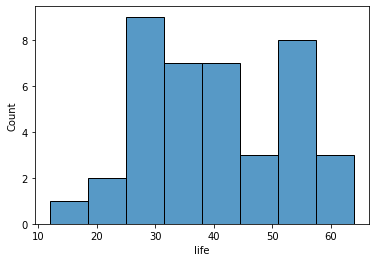

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=data, x='life', bins=8)
plt.show()

In [ ]:
from scipy.stats import norm
mean = np.mean(data['life'])
std = np.std(data['life'])
bins = 8
interval = []
for i in range(1, 9):
  val = norm.ppf(i/bins, mean, std)
  interval.append(val)
print(interval)

[26.056476255663902, 31.762378497044118, 36.02928282685201, 39.85, 43.67071717314799, 47.937621502955885, 53.6435237443361, inf]


In [ ]:
interval.insert(0, -np.inf)
print(interval)

[-inf, 26.056476255663902, 31.762378497044118, 36.02928282685201, 39.85, 43.67071717314799, 47.937621502955885, 53.6435237443361, inf]


In [ ]:
df = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
df

,lower_limit,upper_limit
0,-inf,26.056476
1,26.056476,31.762378
2,31.762378,36.029283
3,36.029283,39.850000
4,39.850000,43.670717
5,43.670717,47.937622
6,47.937622,53.643524
7,53.643524,inf


In [ ]:
life_values = list(sorted(data['life']))
df['obs_freq'] = df.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
df['exp_freq'] = 5
df

,lower_limit,upper_limit,obs_freq,exp_freq
0,-inf,26.056476,4,5
1,26.056476,31.762378,8,5
2,31.762378,36.029283,6,5
3,36.029283,39.850000,2,5
4,39.850000,43.670717,6,5
5,43.670717,47.937622,2,5
6,47.937622,53.643524,6,5
7,53.643524,inf,6,5


In [ ]:
print("Null Hypothesis is that the sample data follows the normal distribution")
print("Alternate Hypothesis is that the sample data does not follow the normal distribution")
alpha = 0.05
chi2_stats, p_value = stats.chisquare(df['obs_freq'], df['exp_freq'])
print(f"Chisquare_statistics: {chi2_stats} and p-value: {p_value}")
if p_value > alpha:
  print(f"Failed to reject null hypothesis for level of significance = {alpha}")
else:
  print(f'Null Hypothesis is rejected for level of significance = {alpha}')

Null Hypothesis is that the sample data follows the normal distribution
Alternate Hypothesis is that the sample data does not follow the normal distribution
Chisquare_statistics: 6.4 and p-value: 0.4938946499688296
Failed to reject null hypothesis for level of significance = 0.05


## Q8
Check whether the dice is unbiased. It is tossed 90 times and the counts of outcomes are given in table. 

In [ ]:
path = "/content/drive/MyDrive/Datasets/uniform_dice.csv"
data = pd.read_csv(path)
data

,face,obs_freq
0,1,17
1,2,11
2,3,18
3,4,12
4,5,15
5,6,17


In [ ]:
data['exp_freq'] = int(sum(data['obs_freq'])/6)
data

,face,obs_freq,exp_freq
0,1,17,15
1,2,11,15
2,3,18,15
3,4,12,15
4,5,15,15
5,6,17,15


In [ ]:
print("Null Hypothesis is that the sample data follows the uniform distribution")
print("Alternate Hypothesis is that the sample data does not follow uniform distribution")
alpha = 0.05
chi2_stats, p_value = stats.chisquare(data['obs_freq'], data['exp_freq'])
print(f"Chisquare_statistics: {chi2_stats} and p-value: {p_value}")
if p_value > alpha:
  print(f"Failed to reject null hypothesis for level of significance = {alpha}")
else:
  print(f'Null Hypothesis is rejected for level of significance = {alpha}')

Null Hypothesis is that the sample data follows the uniform distribution
Alternate Hypothesis is that the sample data does not follow uniform distribution
Chisquare_statistics: 2.8 and p-value: 0.7307864865887586
Failed to reject null hypothesis for level of significance = 0.05
